In [1]:
from utils.analysis import Signal
from utils.plotter import Hist, Hist2d
from utils.files import *
from utils.varUtils import *
from utils.useCMSstyle import *
plt.style.use(CMS)
import awkward as ak

/uscms/home/srosenzw/nobackup/miniconda3/envs/work/lib/python3.8/site-packages/awkward0/__init__.py:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(numpy.__version__) < distutils.version.LooseVersion("1.13.1"):


Welcome to JupyROOT 6.24/06


In [2]:
from utils.useCMSstyle import *
plt.style.use(CMS)

In [3]:
tree = Signal(get_NMSSM(700,400))

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root


In [5]:
# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

mHbins = np.linspace(0,600,100)
score_bins = np.linspace(0.35,1.01,100)

Rectangular Regions
CR: 65115
VR: 27392
dat_CRhs 7883
dat_CRls 57232
dat_VRhs 3705
dat_VRls 23687
Rectangular Regions
CR: 5625
VR: 16908
dat_CRhs 689
dat_CRls 4936
dat_VRhs 2172
dat_VRls 14736


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


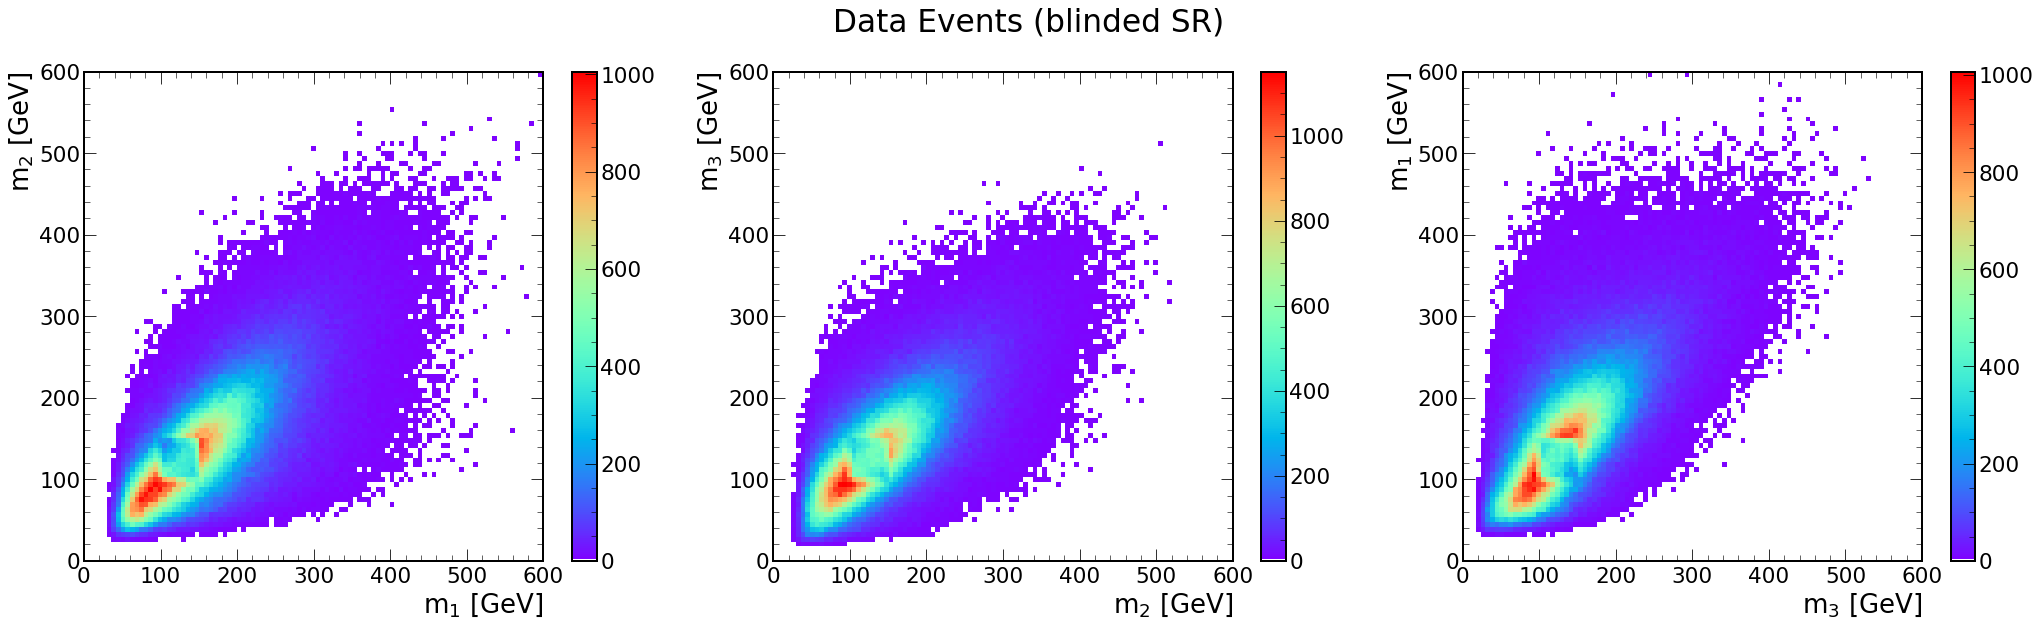

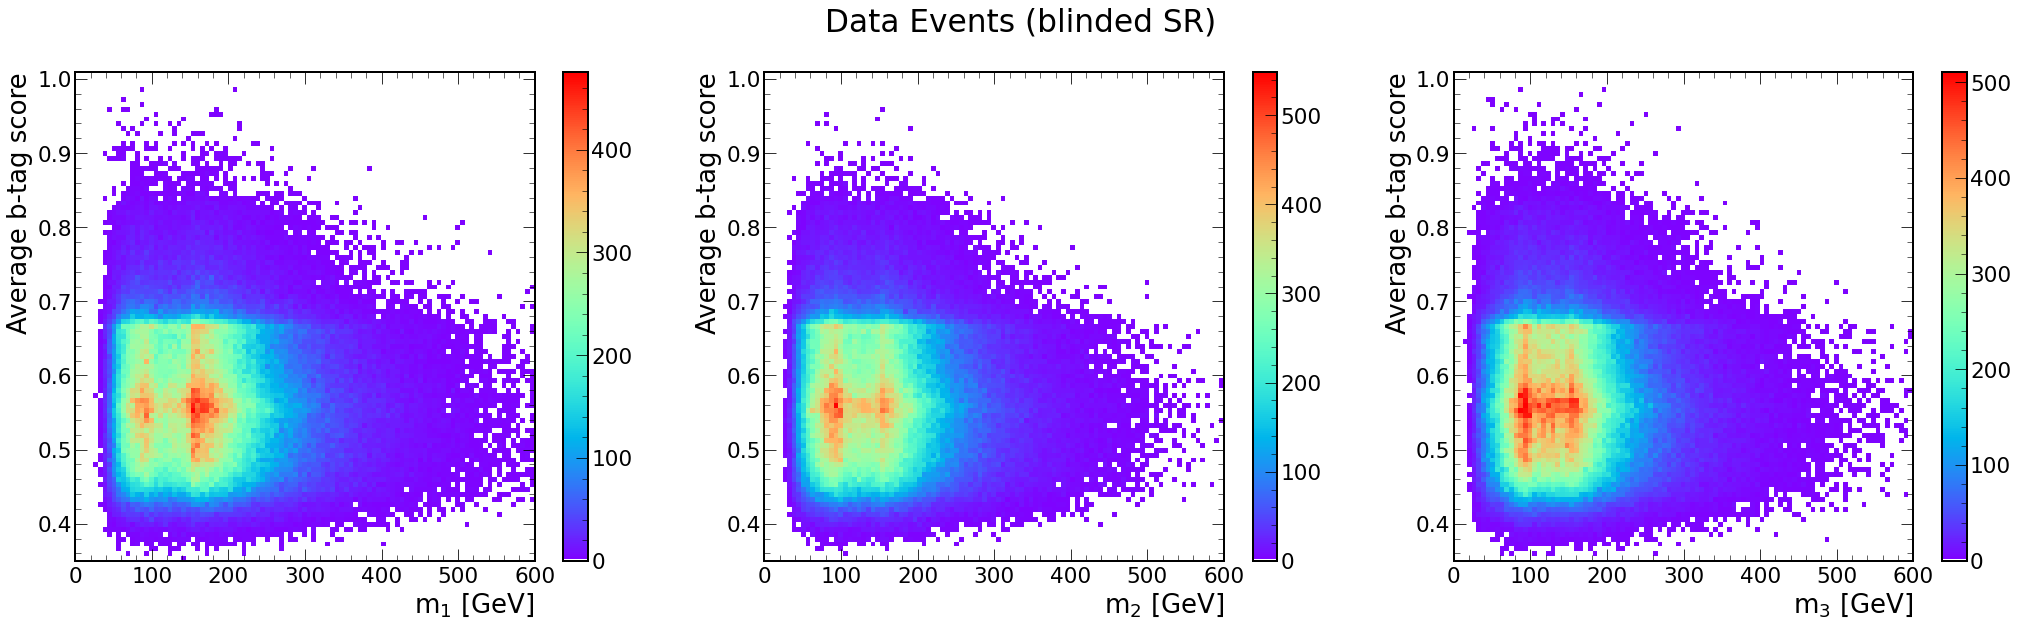

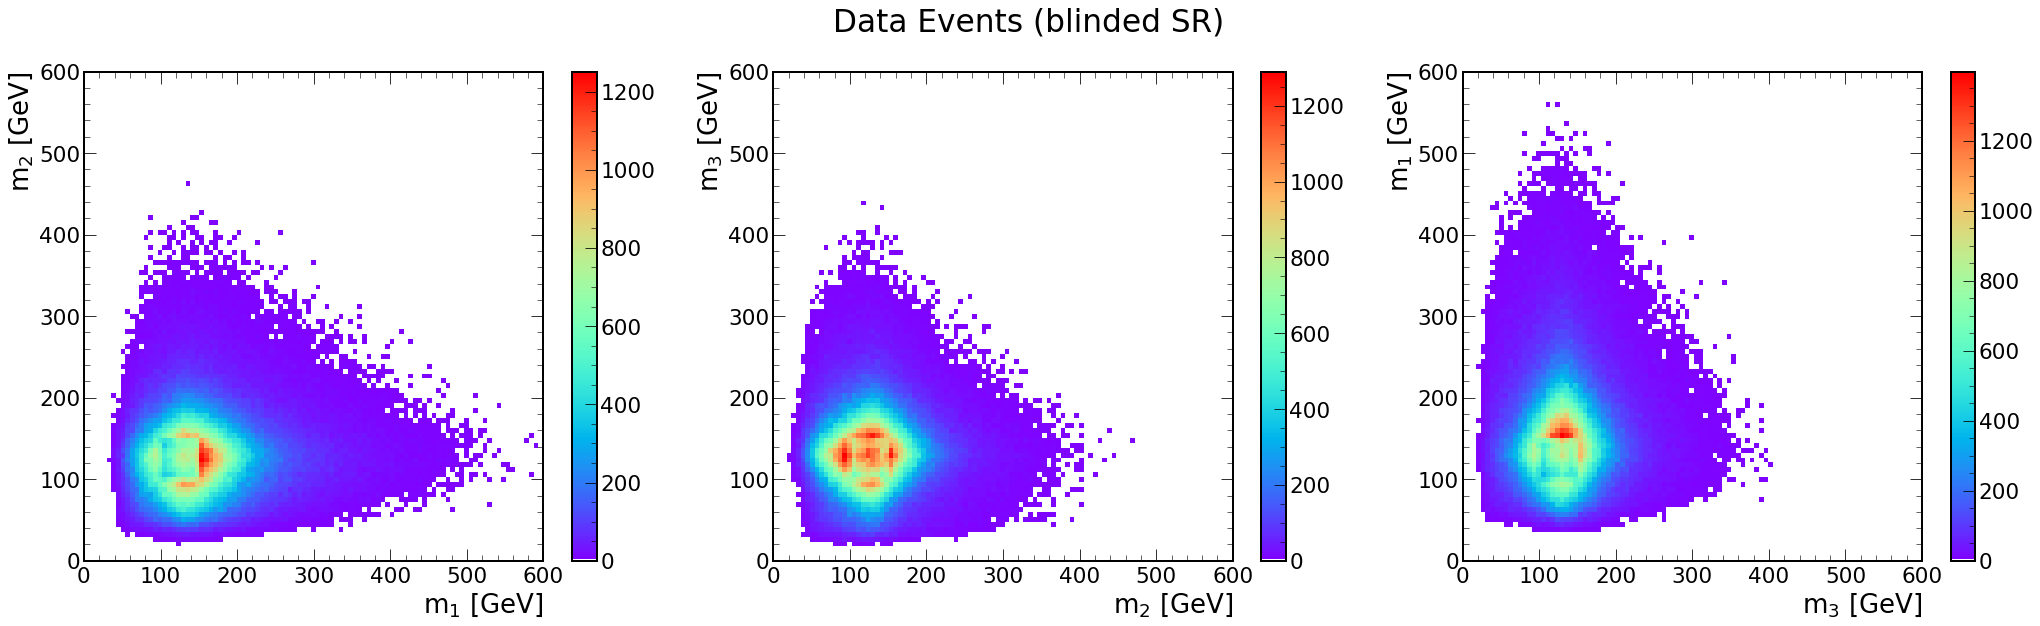

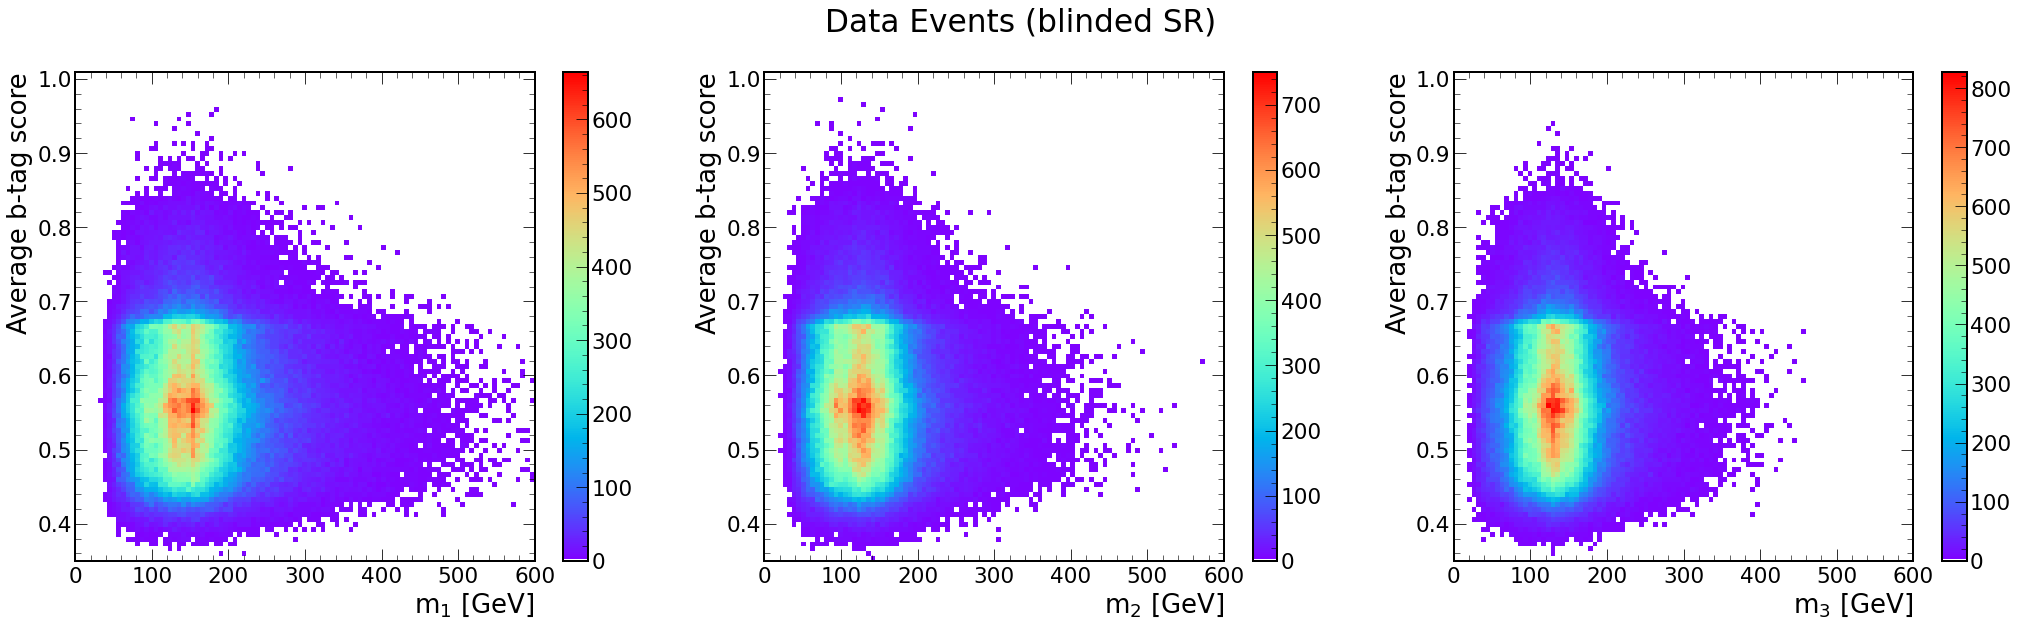

In [6]:
for data_tree in [data_dHHH_tree, data_mH_tree]:

    dat_sums = data_tree.btag_avg
    dat_hi = dat_sums >= 0.66
    dat_lo = dat_sums < 0.66

    # dat_Dm_cand = abs(data_tree.t6_higgs_m - 125)
    # dat_Dm      = (data_tree.t6_higgs_m - 125)
    dat_mCand = data_tree.mCand
    dat_DeltaM = data_tree.DeltaM

    # triple mass veto
    dat_SR = ak.all(dat_DeltaM <= SR_edge, axis=1) # SR
    dat_VR = ak.all(dat_DeltaM > SR_edge, axis=1) & ak.all(dat_DeltaM <= VR_edge, axis=1) # VR
    # dat_CR = ak.all(dat_Dm_cand <= CR_edge, axis=1) # CR
    dat_CR = ak.all(dat_DeltaM > VR_edge, axis=1)

    print("Rectangular Regions")
    print(f"CR: {ak.sum(dat_CR)}")
    print(f"VR: {ak.sum(dat_VR)}")

    dat_CRhs = dat_CR & dat_hi
    dat_CRls = dat_CR & dat_lo
    dat_VRhs = dat_VR & dat_hi
    dat_VRls = dat_VR & dat_lo

    print("dat_CRhs",ak.sum(dat_CRhs))
    print("dat_CRls",ak.sum(dat_CRls))
    print("dat_VRhs",ak.sum(dat_VRhs))
    print("dat_VRls",ak.sum(dat_VRls))

    dat_CRVR = dat_CR & dat_VR

    dat_m1 = dat_mCand[:,0][~dat_SR]
    dat_m2 = dat_mCand[:,1][~dat_SR]
    dat_m3 = dat_mCand[:,2][~dat_SR]

    fig, axs = plt.subplots(figsize=(35,9), nrows=1, ncols=3)
    fig.suptitle('Data Events (blinded SR)')

    ax = axs[0]
    n,xe,ye,im = Hist2d(dat_m1, dat_m2, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[1]
    n,xe,ye,im = Hist2d(dat_m2, dat_m3, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[2]
    n,xe,ye,im = Hist2d(dat_m3, dat_m1, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    for i,ax in enumerate(axs.flatten()):
        # draw_circle = plt.Circle((125, 125), 25, fill=False, color='k', linewidth=1.5)
        # ax.add_artist(draw_circle)
        # draw_circle = plt.Circle((125, 125), 60, fill=False, color='k', linewidth=1.5)
        # ax.add_artist(draw_circle)
        # draw_circle = plt.Circle((185, 185), 25, fill=False, color='k', linewidth=1.5)
        # ax.add_artist(draw_circle)
        # draw_circle = plt.Circle((185, 185), 60, fill=False, color='k', linewidth=1.5)
        # ax.add_artist(draw_circle)
        # ax.set_ylabel('Average b-tag score')
        ax.set_xlabel(f'$m_{i+1}$ [GeV]')
        if i ==2: i = -1
        ax.set_ylabel(f'$m_{i+2}$ [GeV]')
    # fig.savefig('../plots/Data_SRexclusion_mHreco.pdf', bbox_inches='tight')

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

    ax = axs[0]
    n,xe,ye,im = Hist2d(dat_m1, dat_sums[~dat_SR], bins=(mHbins, score_bins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[1]
    n,xe,ye,im = Hist2d(dat_m2, dat_sums[~dat_SR], bins=(mHbins, score_bins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[2]
    n,xe,ye,im = Hist2d(dat_m3, dat_sums[~dat_SR], bins=(mHbins, score_bins), ax=ax)
    fig.colorbar(im, ax=ax)

    for i,ax in enumerate(axs.flatten()):
        ax.set_ylabel('Average b-tag score')
        ax.set_xlabel(f'$m_{i+1}$ [GeV]')

    fig.suptitle('Data Events (blinded SR)')

    # fig.savefig('Signal_700_400_btag_v_mHreco.pdf', bbox_inches='tight')

SR: 11905
CR: 4169
VR: 1745
Rectangular Regions
sig_CRhs 2210
sig_CRls 1959
sig_VRhs 1088
sig_VRls 657
sig_SRhs 8607
sig_SRls 3298
SR: 12527
CR: 183
VR: 664
Rectangular Regions
sig_CRhs 70
sig_CRls 113
sig_VRhs 371
sig_VRls 293
sig_SRhs 9037
sig_SRls 3490


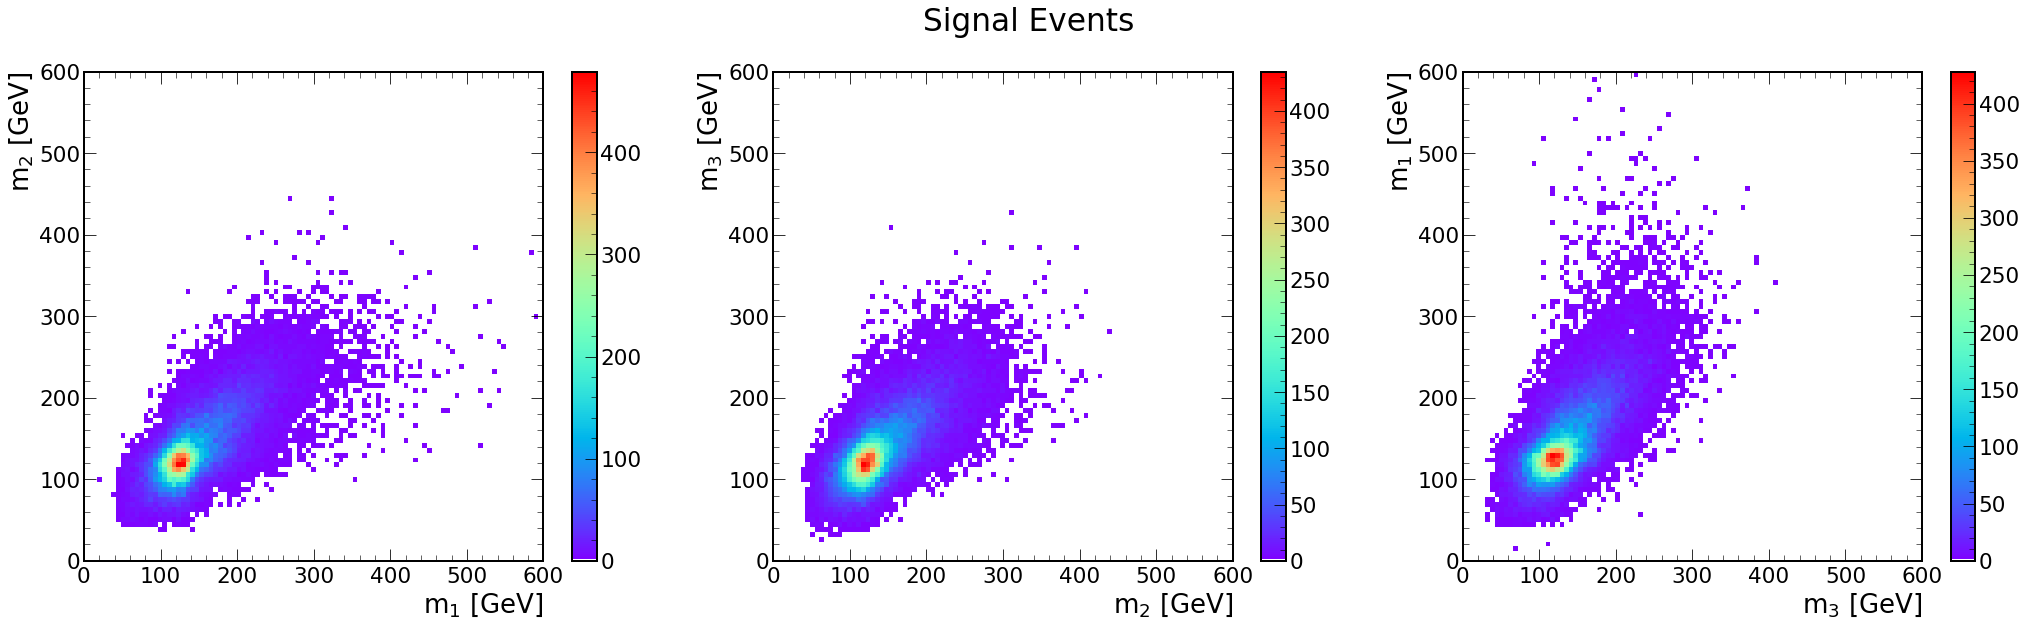

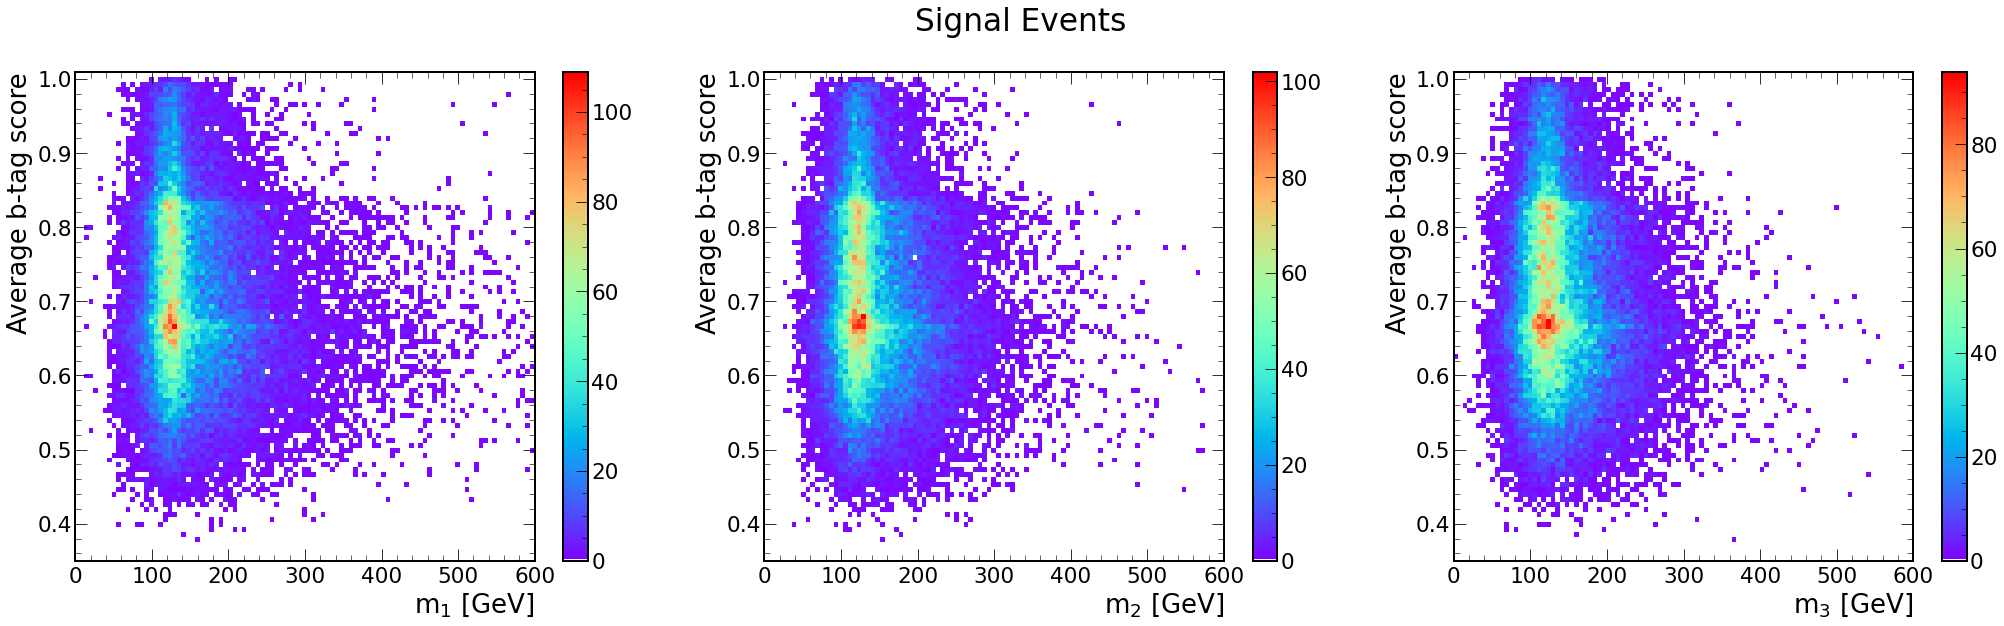

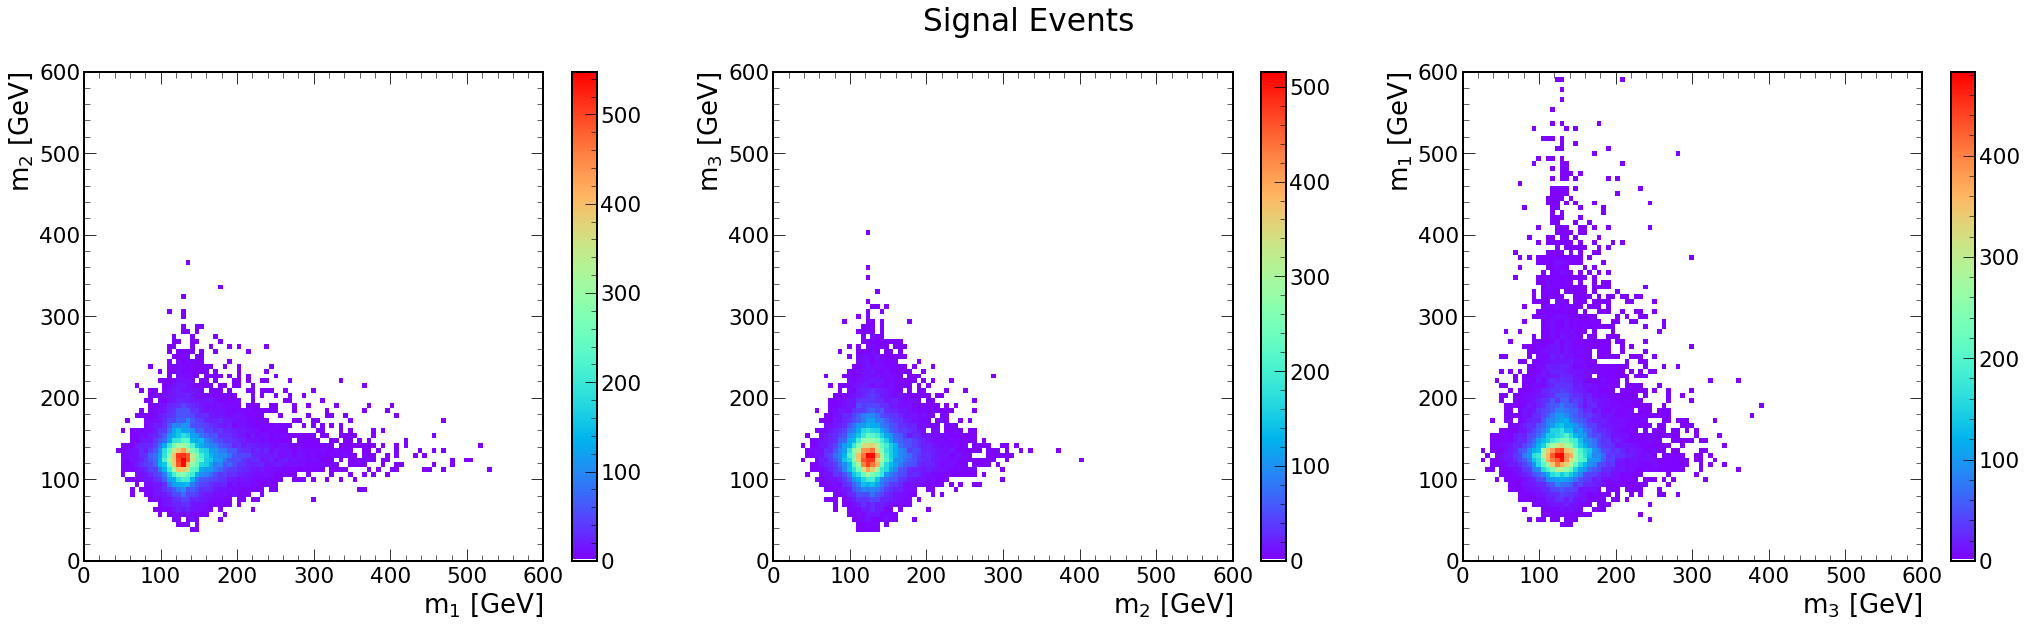

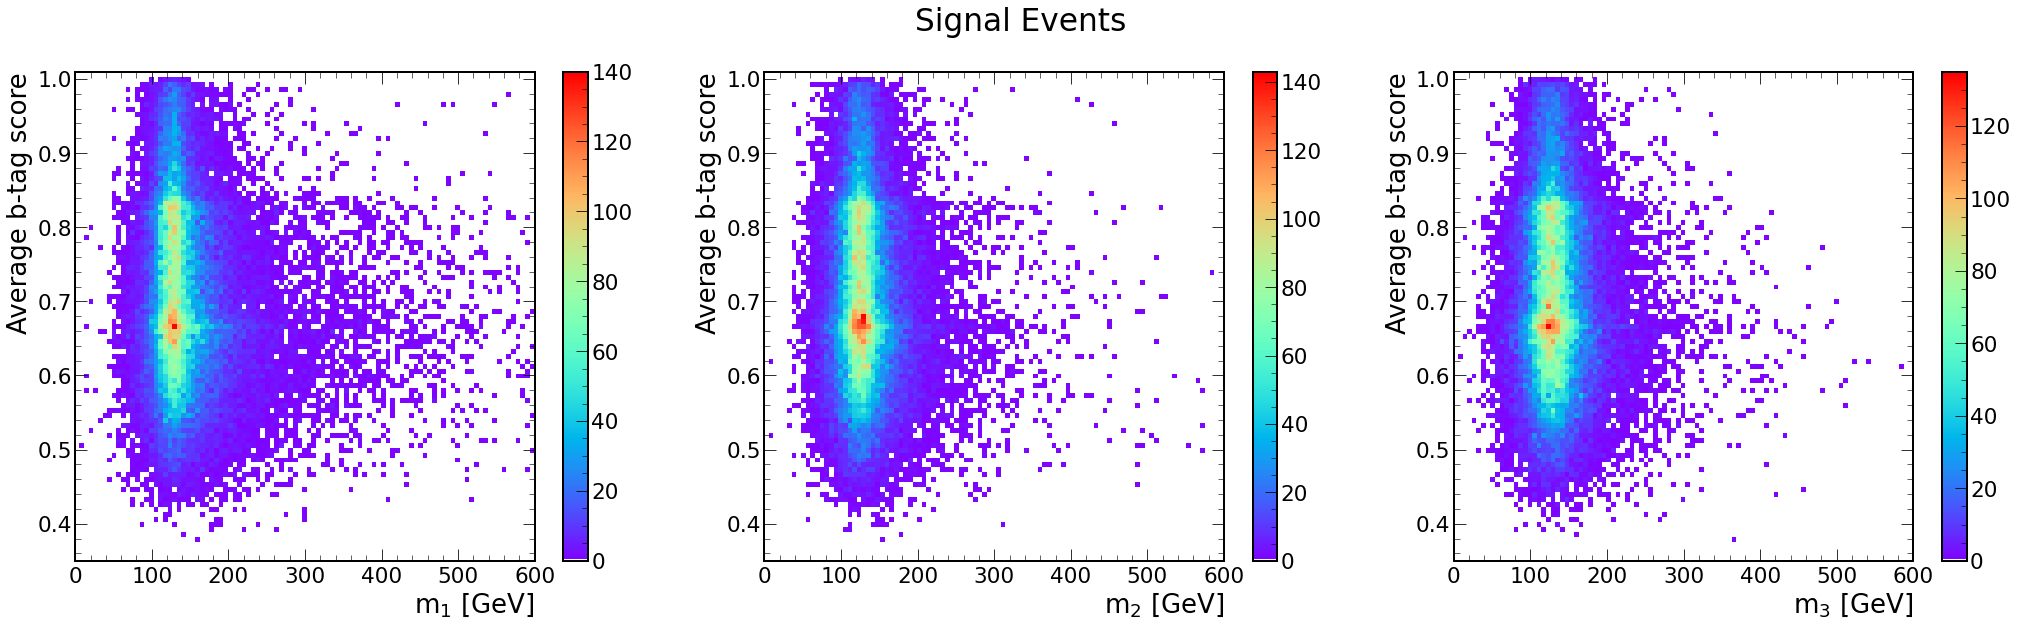

In [7]:
for sig_tree in [sig_dHHH_tree, sig_mH_tree]:

    sig_sums = sig_tree.btag_avg
    sig_hi = sig_sums >= 0.66
    sig_lo = sig_sums < 0.66

    # sig_Dm_cand = abs(sig_tree.t6_higgs_m - 125)
    # sig_Dm      = (sig_tree.t6_higgs_m - 125)
    sig_mCand = sig_tree.mCand
    sig_DeltaM = sig_tree.DeltaM

    # triple mass veto
    sig_SR = ak.all(sig_DeltaM <= SR_edge, axis=1) # SR
    sig_VR = ak.all(sig_DeltaM > SR_edge, axis=1) & ak.all(sig_DeltaM <= VR_edge, axis=1) # VR
    # sig_CR = ak.all(sig_Dm_cand <= CR_edge, axis=1) # CR
    sig_CR = ak.all(sig_DeltaM > VR_edge, axis=1)

    print(f"SR: {ak.sum(sig_SR)}")
    print(f"CR: {ak.sum(sig_CR)}")
    print(f"VR: {ak.sum(sig_VR)}")

    sig_CRhs = sig_CR & sig_hi
    sig_CRls = sig_CR & sig_lo
    sig_VRhs = sig_VR & sig_hi
    sig_VRls = sig_VR & sig_lo
    sig_SRhs = sig_SR & sig_hi
    sig_SRls = sig_SR & sig_lo

    print("Rectangular Regions")
    print("sig_CRhs",ak.sum(sig_CRhs))
    print("sig_CRls",ak.sum(sig_CRls))
    print("sig_VRhs",ak.sum(sig_VRhs))
    print("sig_VRls",ak.sum(sig_VRls))
    print("sig_SRhs",ak.sum(sig_SRhs))
    print("sig_SRls",ak.sum(sig_SRls))

    sig_m1 = sig_mCand[:,0]
    sig_m2 = sig_mCand[:,1]
    sig_m3 = sig_mCand[:,2]

    fig, axs = plt.subplots(figsize=(35,9), nrows=1, ncols=3)
    fig.suptitle('Signal Events')

    ax = axs[0]
    n,xe,ye,im = Hist2d(sig_m1, sig_m2, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[1]
    n,xe,ye,im = Hist2d(sig_m2, sig_m3, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[2]
    n,xe,ye,im = Hist2d(sig_m3, sig_m1, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    for i,ax in enumerate(axs.flatten()):
        # draw_circle = plt.Circle((125, 125), 25, fill=False, color='k', linewidth=1.5)
        # ax.add_artist(draw_circle)
        # draw_circle = plt.Circle((125, 125), 60, fill=False, color='k', linewidth=1.5)
        # ax.add_artist(draw_circle)
        # draw_circle = plt.Circle((185, 185), 25, fill=False, color='k', linewidth=1.5)
        # ax.add_artist(draw_circle)
        # draw_circle = plt.Circle((185, 185), 60, fill=False, color='k', linewidth=1.5)
        # ax.add_artist(draw_circle)
        # ax.set_ylabel('Average b-tag score')
        ax.set_xlabel(f'$m_{i+1}$ [GeV]')
        if i ==2: i = -1
        ax.set_ylabel(f'$m_{i+2}$ [GeV]')
    # fig.savefig('../plots/Data_SRexclusion_mHreco.pdf', bbox_inches='tight')

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

    ax = axs[0]
    n,xe,ye,im = Hist2d(sig_m1, sig_sums, bins=(mHbins, score_bins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[1]
    n,xe,ye,im = Hist2d(sig_m2, sig_sums, bins=(mHbins, score_bins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[2]
    n,xe,ye,im = Hist2d(sig_m3, sig_sums, bins=(mHbins, score_bins), ax=ax)
    fig.colorbar(im, ax=ax)

    for i,ax in enumerate(axs.flatten()):
        ax.set_ylabel('Average b-tag score')
        ax.set_xlabel(f'$m_{i+1}$ [GeV]')

    fig.suptitle('Signal Events')

    # fig.savefig('Signal_700_400_btag_v_mHreco.pdf', bbox_inches='tight')

Spherical
A_CR: 71946
V_SR: 7587
V_CR: 36881
V_CR_hi 4825
V_CR_lo 32056
V_SR_hi 932
V_SR_lo 6655
Spherical
A_CR: 95983
V_SR: 1454
V_CR: 13813
V_CR_hi 1784
V_CR_lo 12029
V_SR_hi 183
V_SR_lo 1271


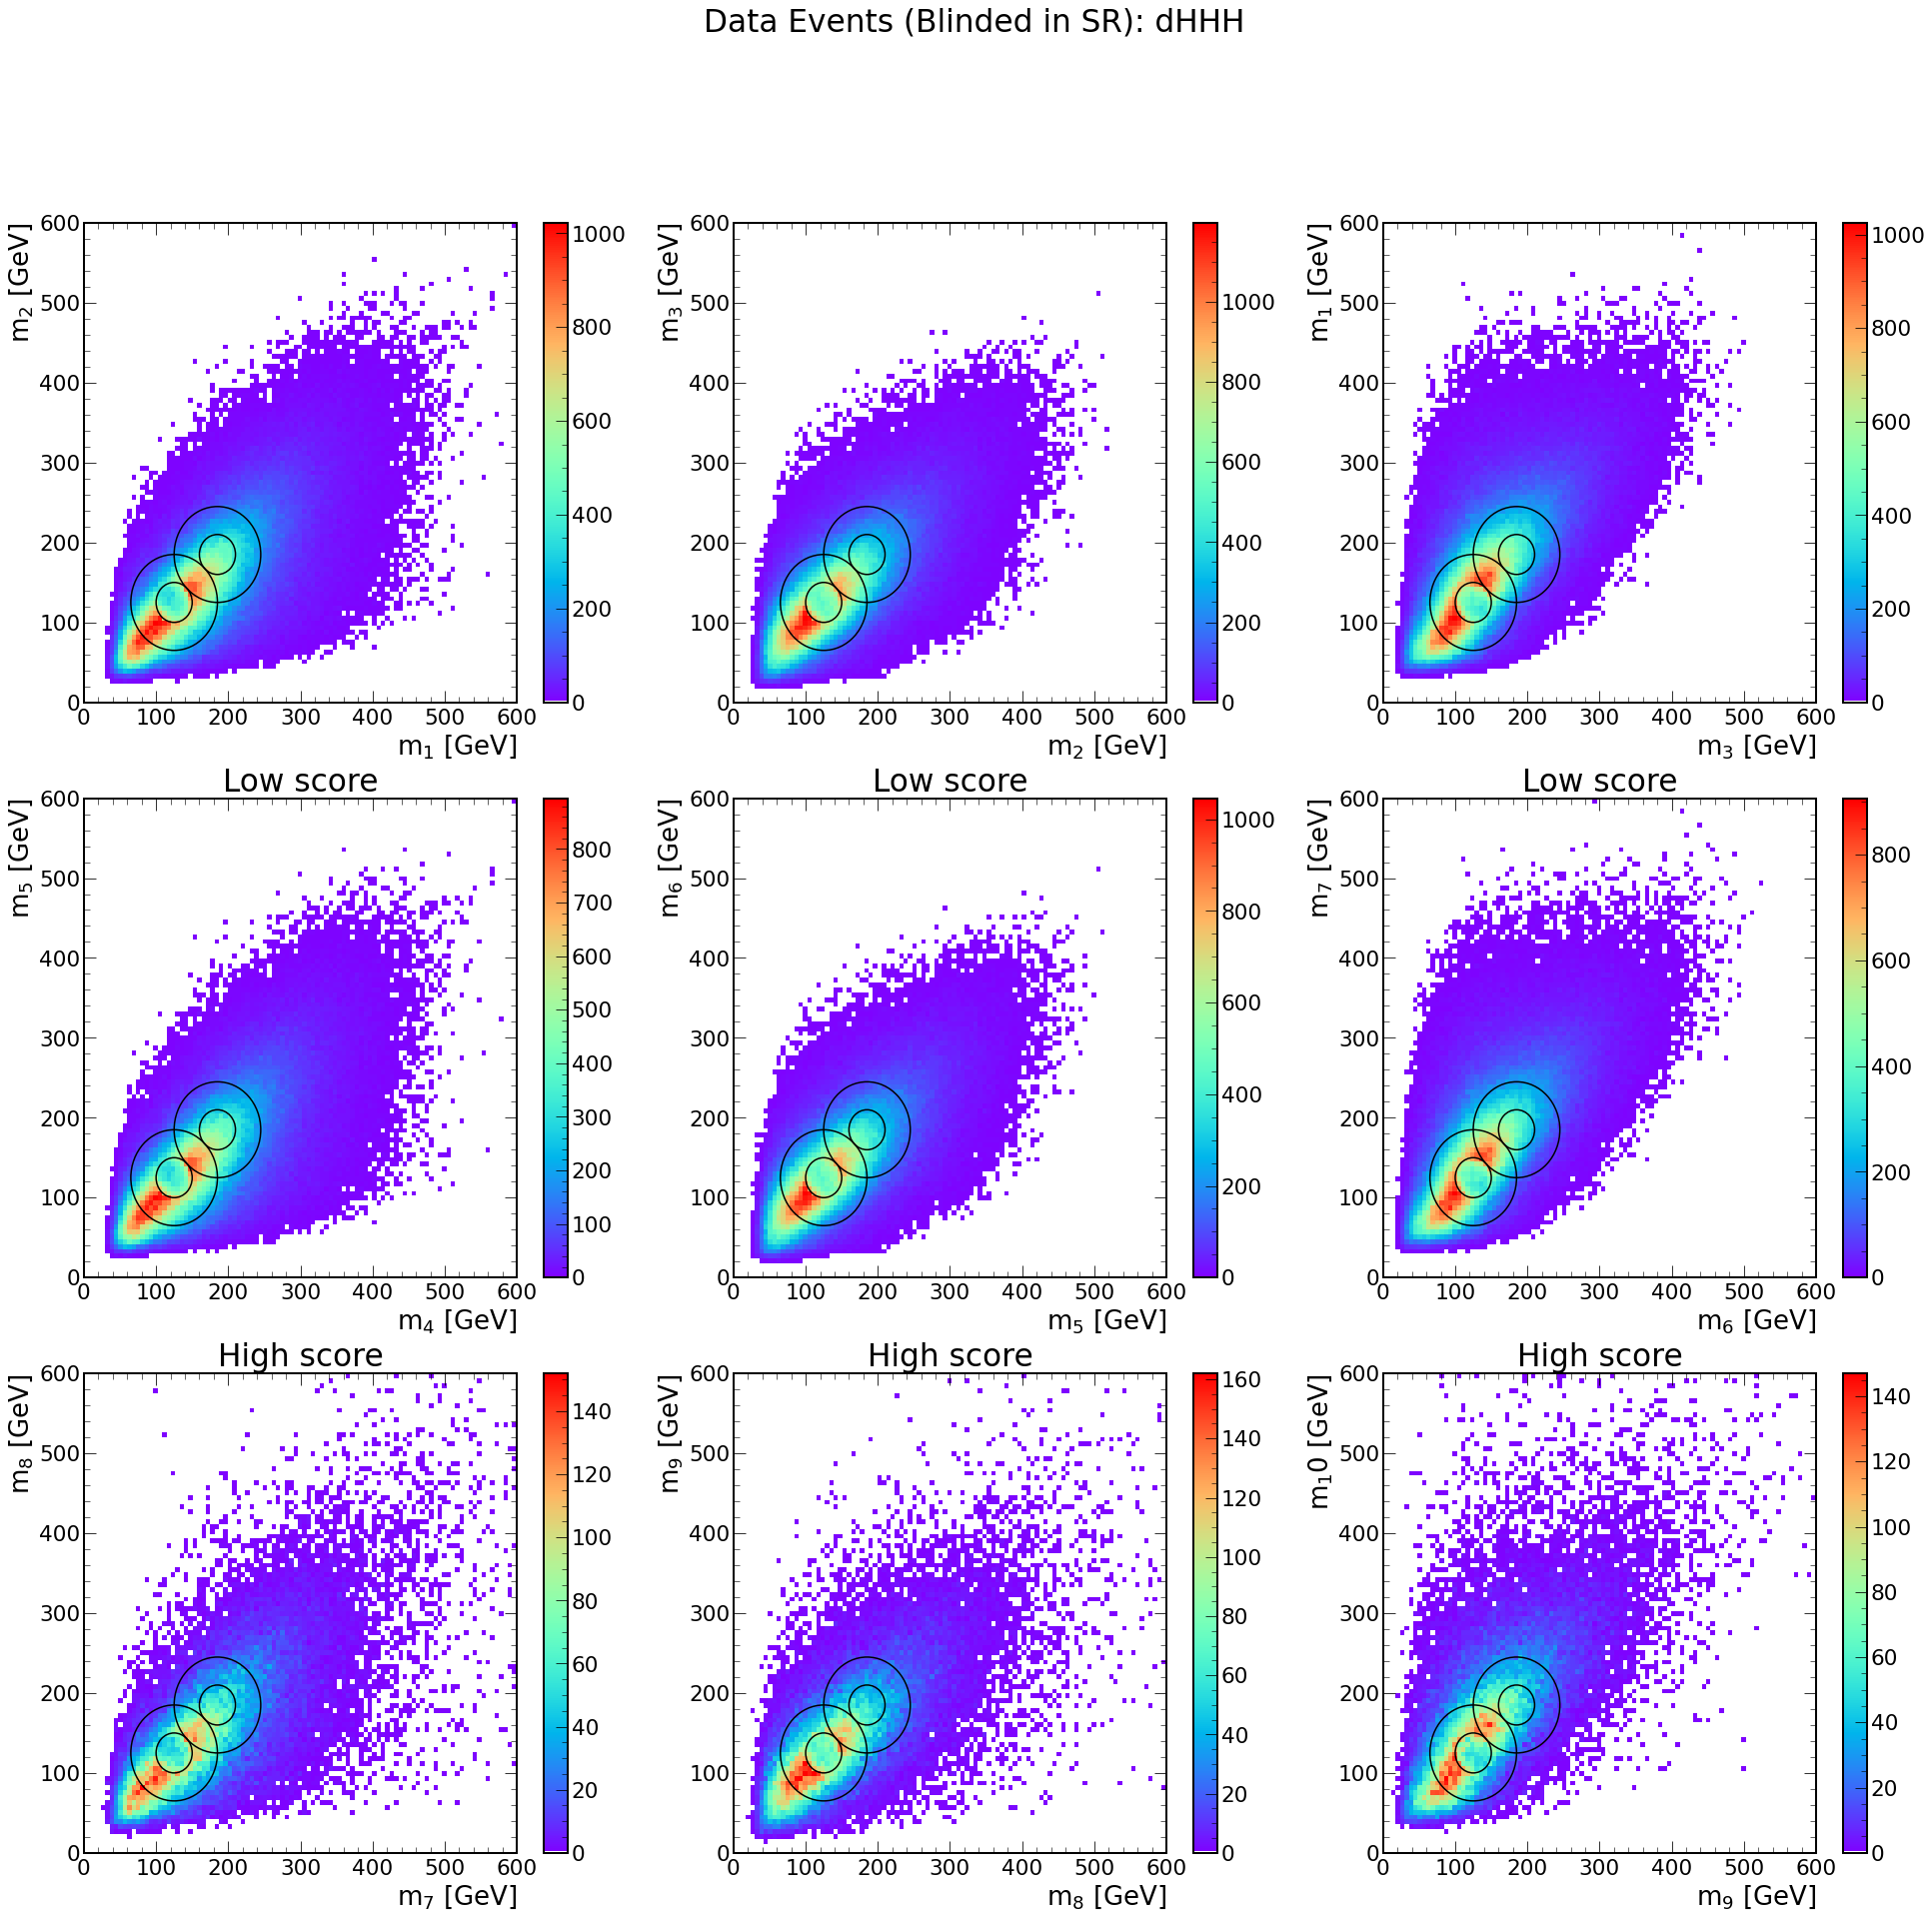

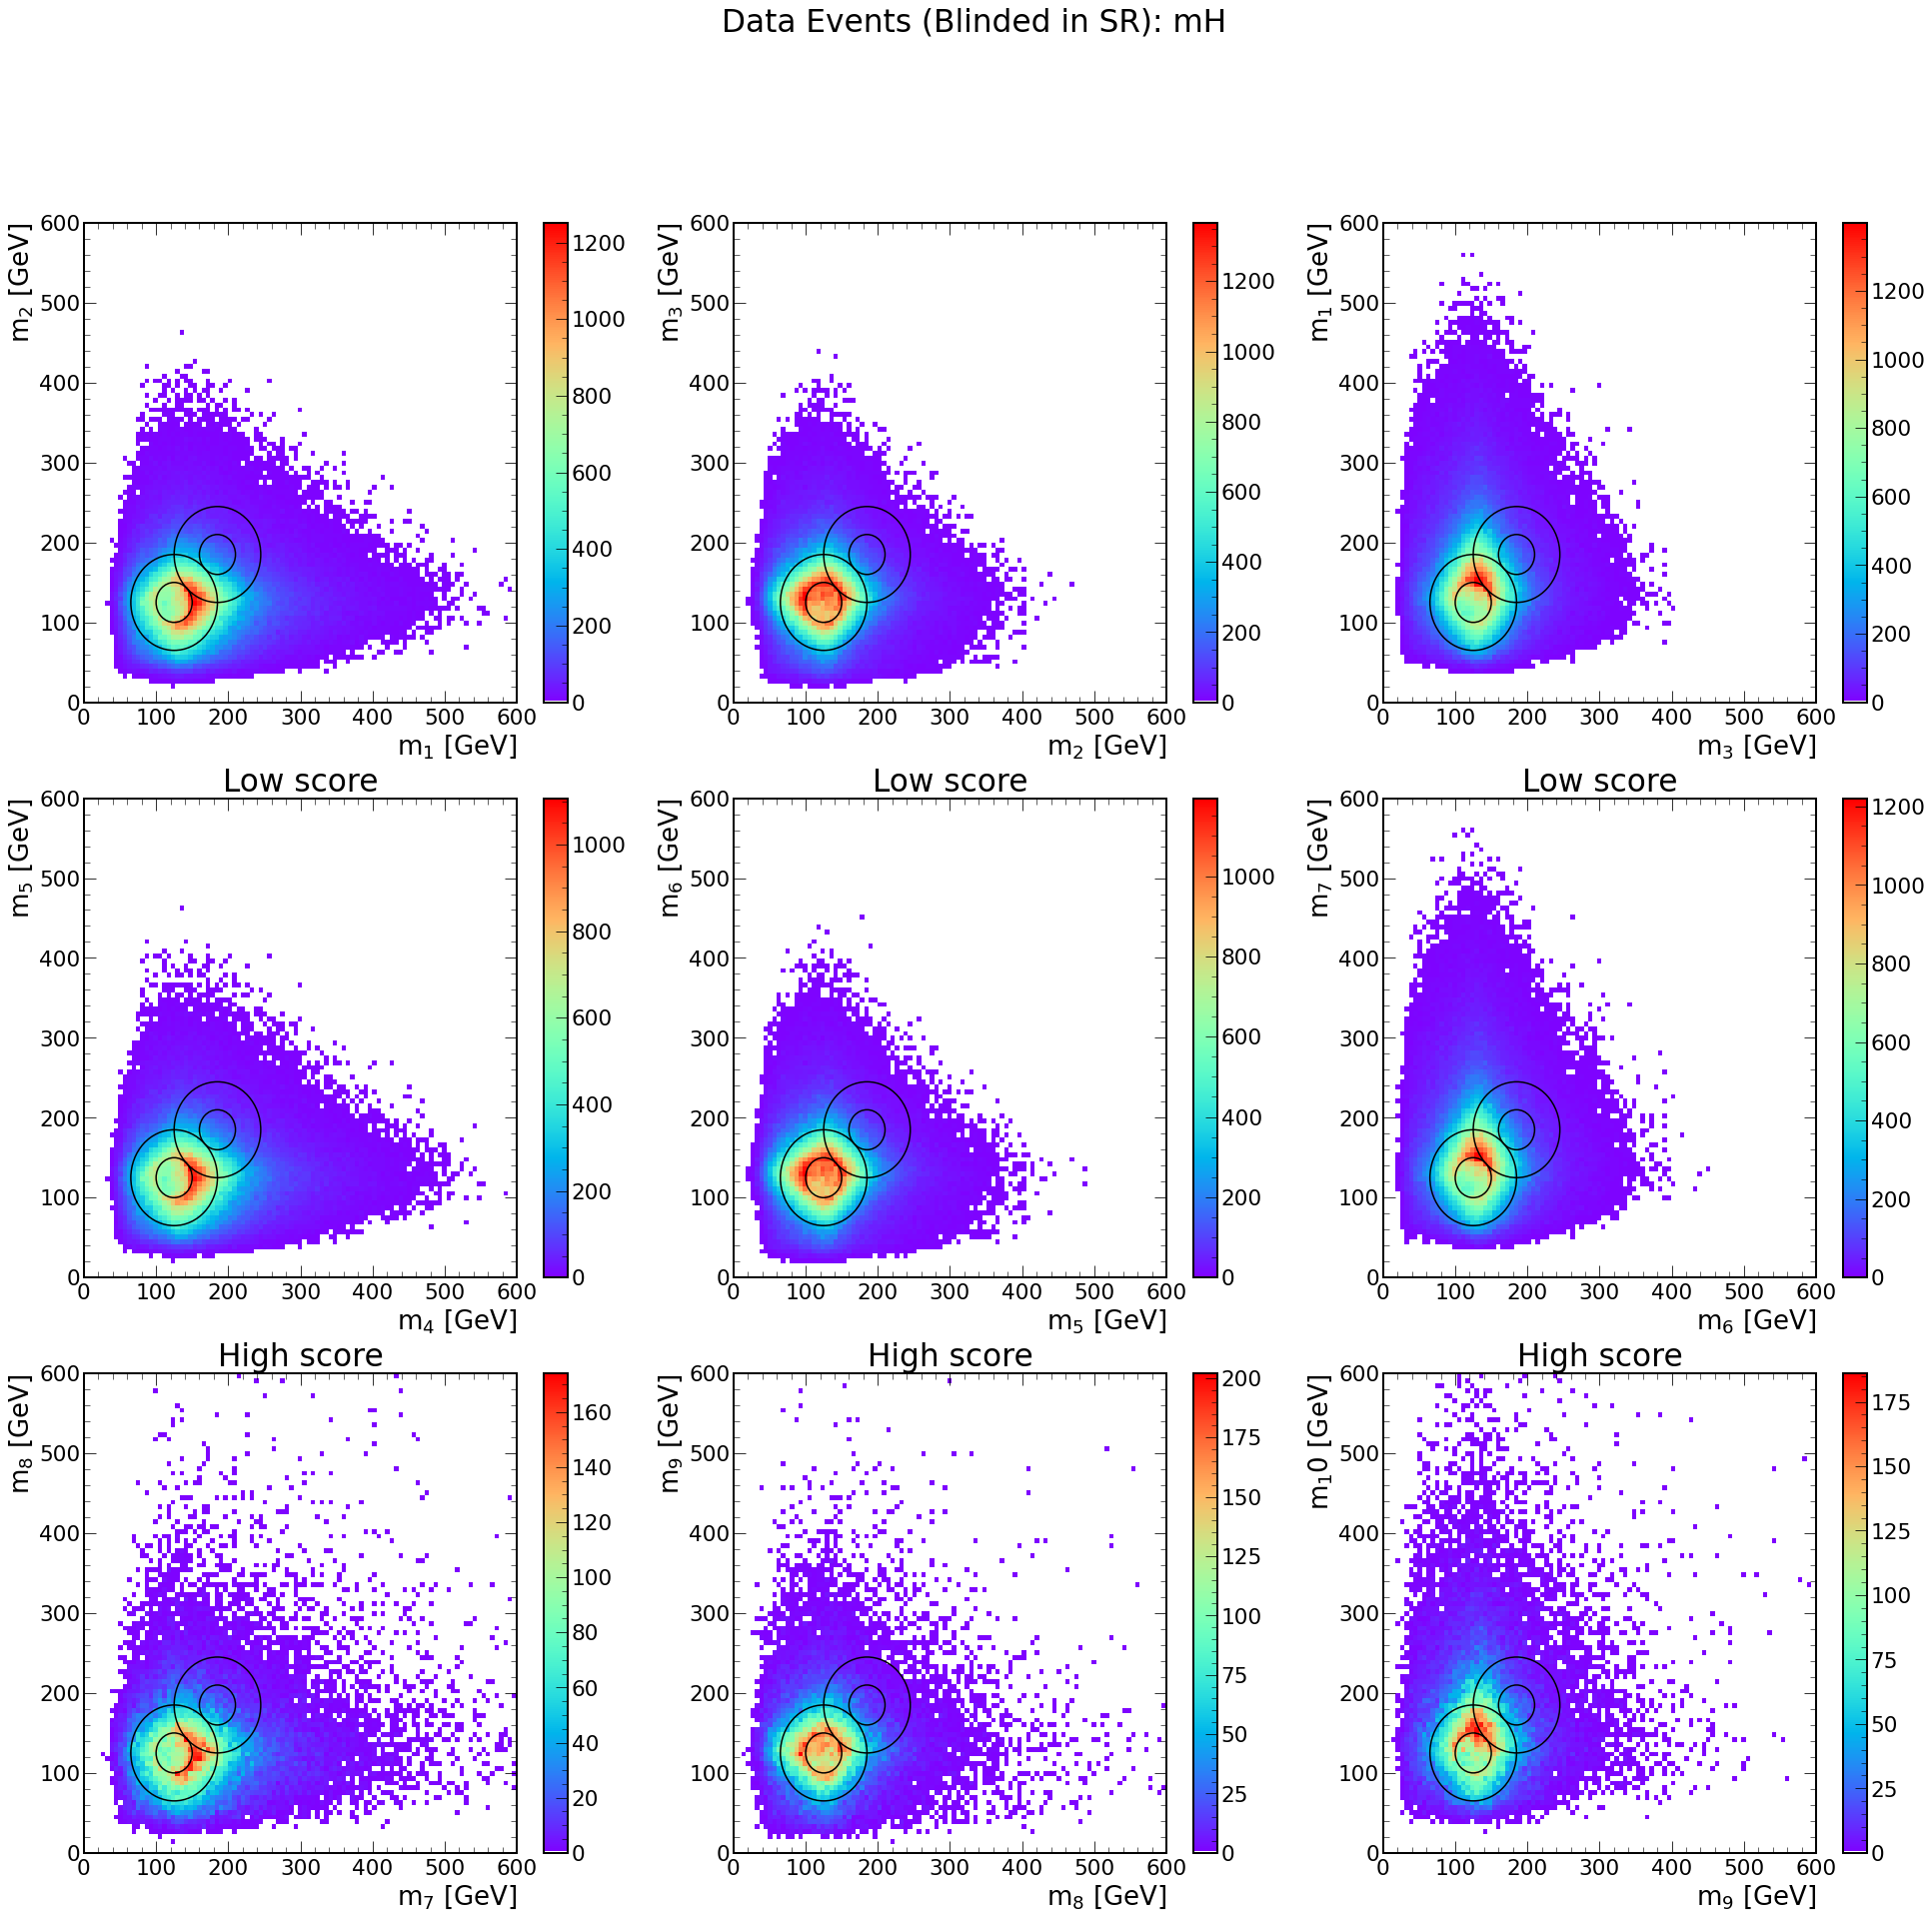

In [15]:
labels = ['dHHH', 'mH']

for j,data_tree in enumerate([data_dHHH_tree, data_mH_tree]):

    dat_sums = data_tree.btag_avg
    dat_hi = dat_sums >= 0.66
    dat_lo = dat_sums < 0.66

    # dat_Dm_cand = abs(data_tree.t6_higgs_m - 125)
    # dat_Dm      = (data_tree.t6_higgs_m - 125)
    dat_mCand = data_tree.mCand
    dat_DeltaM_A = data_tree.DeltaM
    dat_DeltaM_V = data_tree.DeltaM_V

    dat_DeltaM_r = dat_DeltaM_A * dat_DeltaM_A
    # print(dat_DeltaM) 
    dat_DeltaM_r = dat_DeltaM_r.sum(axis=1)
    dat_DeltaM_r = np.sqrt(dat_DeltaM_r)

    A_SR = dat_DeltaM_r <= SR_edge # SR
    A_CR = (dat_DeltaM_r > SR_edge) & (dat_DeltaM_r <= 50) # VR

    dat_DeltaM_r = dat_DeltaM_V * dat_DeltaM_V
    # print(dat_DeltaM) 
    dat_DeltaM_r = dat_DeltaM_r.sum(axis=1)
    dat_DeltaM_r = np.sqrt(dat_DeltaM_r)

    V_SR = dat_DeltaM_r <= SR_edge # SR
    V_CR = (dat_DeltaM_r > SR_edge) & (dat_DeltaM_r <= 50) # VR

    print("Spherical")
    print(f"A_CR: {ak.sum(A_CR)}")
    print(f"V_SR: {ak.sum(V_SR)}")
    print(f"V_CR: {ak.sum(V_CR)}")

    V_CR_hi = V_CR & dat_hi
    V_CR_lo = V_CR & dat_lo
    V_SR_hi = V_SR & dat_hi
    V_SR_lo = V_SR & dat_lo

    print("V_CR_hi",ak.sum(V_CR_hi))
    print("V_CR_lo",ak.sum(V_CR_lo))
    print("V_SR_hi",ak.sum(V_SR_hi))
    print("V_SR_lo",ak.sum(V_SR_lo))

    dat_CRVR = dat_CR & dat_VR

    dat_m1 = dat_mCand[:,0][~A_SR]
    dat_m2 = dat_mCand[:,1][~A_SR]
    dat_m3 = dat_mCand[:,2][~A_SR]
    # dat_m1 = dat_mCand[:,0][V_CR]
    # dat_m2 = dat_mCand[:,1][V_CR]
    # dat_m3 = dat_mCand[:,2][V_CR]

    fig, axs = plt.subplots(figsize=(33,30), nrows=3, ncols=3)
    fig.suptitle(f'Data Events (Blinded in SR): {labels[j]}')

    ax = axs[0][0]
    n,xe,ye,im = Hist2d(dat_m1, dat_m2, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[0][1]
    n,xe,ye,im = Hist2d(dat_m2, dat_m3, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[0][2]
    n,xe,ye,im = Hist2d(dat_m3, dat_m1, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    dat_m1 = dat_mCand[:,0][~A_SR & dat_lo]
    dat_m2 = dat_mCand[:,1][~A_SR & dat_lo]
    dat_m3 = dat_mCand[:,2][~A_SR & dat_lo]

    ax = axs[1][0]
    n,xe,ye,im = Hist2d(dat_m1, dat_m2, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('Low score')

    ax = axs[1][1]
    n,xe,ye,im = Hist2d(dat_m2, dat_m3, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('Low score')

    ax = axs[1][2]
    n,xe,ye,im = Hist2d(dat_m3, dat_m1, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('Low score')
    
    dat_m1 = dat_mCand[:,0][~A_SR & dat_hi]
    dat_m2 = dat_mCand[:,1][~A_SR & dat_hi]
    dat_m3 = dat_mCand[:,2][~A_SR & dat_hi]

    ax = axs[2][0]
    n,xe,ye,im = Hist2d(dat_m1, dat_m2, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('High score')

    ax = axs[2][1]
    n,xe,ye,im = Hist2d(dat_m2, dat_m3, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('High score')

    ax = axs[2][2]
    n,xe,ye,im = Hist2d(dat_m3, dat_m1, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('High score')

    for i,ax in enumerate(axs.flatten()):
        draw_circle = plt.Circle((125, 125), SR_edge, fill=False, color='k', linewidth=1.5)
        ax.add_artist(draw_circle)
        draw_circle = plt.Circle((125, 125), VR_edge, fill=False, color='k', linewidth=1.5)
        ax.add_artist(draw_circle)
        draw_circle = plt.Circle((185, 185), SR_edge, fill=False, color='k', linewidth=1.5)
        ax.add_artist(draw_circle)
        draw_circle = plt.Circle((185, 185), VR_edge, fill=False, color='k', linewidth=1.5)
        ax.add_artist(draw_circle)
        # ax.set_ylabel('Average b-tag score')
        ax.set_xlabel(f'$m_{i+1}$ [GeV]')
        if i ==2: i = -1
        ax.set_ylabel(f'$m_{i+2}$ [GeV]')
    if j == 0:
        fig.savefig('../plots/Data_SRexclusion_mHreco_hs_ls.pdf', bbox_inches='tight')
    # break
    # fig.savefig(f'../plots/Data_SRexclusion_mHreco_spherical_{labels[j]}.pdf', bbox_inches='tight')

In [ ]:
labels = ['dHHH', 'mH']

for i,sig_tree in enumerate([sig_dHHH_tree, sig_mH_tree]):

    sig_sums = data_tree.btag_avg
    sig_hi = sig_sums >= 0.66
    sig_lo = sig_sums < 0.66

    # sig_Dm_cand = abs(data_tree.t6_higgs_m - 125)
    # sig_Dm      = (data_tree.t6_higgs_m - 125)
    sig_mCand = data_tree.mCand
    sig_DeltaM_A = data_tree.DeltaM
    sig_DeltaM_V = data_tree.DeltaM_V

    sig_DeltaM_r = sig_DeltaM_A * sig_DeltaM_A
    # print(sig_DeltaM) 
    sig_DeltaM_r = sig_DeltaM_r.sum(axis=1)
    sig_DeltaM_r = np.sqrt(sig_DeltaM_r)

    A_SR = sig_DeltaM_r <= SR_edge # SR
    A_CR = (sig_DeltaM_r > SR_edge) & (sig_DeltaM_r <= 50) # VR

    sig_DeltaM_r = sig_DeltaM_V * sig_DeltaM_V
    # print(sig_DeltaM) 
    sig_DeltaM_r = sig_DeltaM_r.sum(axis=1)
    sig_DeltaM_r = np.sqrt(sig_DeltaM_r)

    V_SR = sig_DeltaM_r <= SR_edge # SR
    V_CR = (sig_DeltaM_r > SR_edge) & (sig_DeltaM_r <= 50) # VR

    print("Spherical")
    print(f"A_CR: {ak.sum(A_CR)}")
    print(f"V_SR: {ak.sum(V_SR)}")
    print(f"V_CR: {ak.sum(V_CR)}")

    V_CR_hi = V_CR & sig_hi
    V_CR_lo = V_CR & sig_lo
    V_SR_hi = V_SR & sig_hi
    V_SR_lo = V_SR & sig_lo

    print("V_CR_hi",ak.sum(V_CR_hi))
    print("V_CR_lo",ak.sum(V_CR_lo))
    print("V_SR_hi",ak.sum(V_SR_hi))
    print("V_SR_lo",ak.sum(V_SR_lo))

    sig_CRVR = sig_CR & sig_VR

    sig_m1 = sig_mCand[:,0][~A_SR]
    sig_m2 = sig_mCand[:,1][~A_SR]
    sig_m3 = sig_mCand[:,2][~A_SR]
    # sig_m1 = sig_mCand[:,0][V_CR]
    # sig_m2 = sig_mCand[:,1][V_CR]
    # sig_m3 = sig_mCand[:,2][V_CR]

    fig, axs = plt.subplots(figsize=(33,30), nrows=3, ncols=3)
    fig.suptitle(f'Signal Events: {labels[j]}')

    ax = axs[0][0]
    n,xe,ye,im = Hist2d(sig_m1, sig_m2, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[0][1]
    n,xe,ye,im = Hist2d(sig_m2, sig_m3, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    ax = axs[0][2]
    n,xe,ye,im = Hist2d(sig_m3, sig_m1, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)

    sig_m1 = sig_mCand[:,0][~A_SR & sig_lo]
    sig_m2 = sig_mCand[:,1][~A_SR & sig_lo]
    sig_m3 = sig_mCand[:,2][~A_SR & sig_lo]

    ax = axs[1][0]
    n,xe,ye,im = Hist2d(sig_m1, sig_m2, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('Low score')

    ax = axs[1][1]
    n,xe,ye,im = Hist2d(sig_m2, sig_m3, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('Low score')

    ax = axs[1][2]
    n,xe,ye,im = Hist2d(sig_m3, sig_m1, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('Low score')
    
    sig_m1 = sig_mCand[:,0][~A_SR & sig_hi]
    sig_m2 = sig_mCand[:,1][~A_SR & sig_hi]
    sig_m3 = sig_mCand[:,2][~A_SR & sig_hi]

    ax = axs[2][0]
    n,xe,ye,im = Hist2d(sig_m1, sig_m2, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('High score')

    ax = axs[2][1]
    n,xe,ye,im = Hist2d(sig_m2, sig_m3, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('High score')

    ax = axs[2][2]
    n,xe,ye,im = Hist2d(sig_m3, sig_m1, bins=(mHbins, mHbins), ax=ax)
    fig.colorbar(im, ax=ax)
    ax.set_title('High score')

    for i,ax in enumerate(axs.flatten()):
        draw_circle = plt.Circle((125, 125), SR_edge, fill=False, color='k', linewidth=1.5)
        ax.add_artist(draw_circle)
        draw_circle = plt.Circle((125, 125), VR_edge, fill=False, color='k', linewidth=1.5)
        ax.add_artist(draw_circle)
        draw_circle = plt.Circle((185, 185), SR_edge, fill=False, color='k', linewidth=1.5)
        ax.add_artist(draw_circle)
        draw_circle = plt.Circle((185, 185), VR_edge, fill=False, color='k', linewidth=1.5)
        ax.add_artist(draw_circle)
        # ax.set_ylabel('Average b-tag score')
        ax.set_xlabel(f'$m_{i+1}$ [GeV]')
        if i ==2: i = -1
        ax.set_ylabel(f'$m_{i+2}$ [GeV]')
    # if j == 0:
    #     fig.savefig('../plots/Data_SRexclusion_mHreco_hs_ls.pdf', bbox_inches='tight')
    # break
    # fig.savefig(f'../plots/Data_SRexclusion_mHreco_spherical_{labels[j]}.pdf', bbox_inches='tight')

# Investigation of b-tag score and its dependence on mHreco

In [9]:
NMSSM_MX_700_MY_400 = '/eos/uscms/store/user/srosenzw/sixb/sixb_ntuples/old_skims/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root'
JetHT_Data_UL = '/eos/uscms/store/user/srosenzw/sixb/sixb_ntuples/old_skims/JetHT_Data_UL/ntuple.root'

In [10]:
from utils.analysis import Tree

In [11]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [12]:
sigTree = Tree(NMSSM_MX_700_MY_400)
sigTree.initialize_t6_X()

sig_X = sigTree.t6_X

In [13]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [14]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

### <span style="font-variant:small-caps;"><font size=4>Region</font></span>: <font size=3>Masks</font>

In [15]:
import awkward as ak

In [16]:
### SIGNAL ###
sig_Dm_cand = abs(sigTree.t6_higgs_m - 125)

# triple mass veto
sig_SR = ak.all(sig_Dm_cand <= SR_edge, axis=1) # SR
sig_VR = ak.all(sig_Dm_cand > SR_edge, axis=1) & ak.all(sig_Dm_cand <= VR_edge, axis=1) # VR
sig_CR = ak.all(sig_Dm_cand > VR_edge, axis=1) # CR

sig_sums = ak.sum(sigTree.t6_jet_btag, axis=1)/6

In [17]:
#### DATA ####

dat_sums = ak.sum(datTree.t6_jet_btag, axis=1)/6
dat_hi = dat_sums >= 0.66
dat_lo = dat_sums < 0.66

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)
dat_Dm      = (datTree.t6_higgs_m - 125)

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR
dat_VR = ak.all(dat_Dm_cand > SR_edge, axis=1) & ak.all(dat_Dm_cand <= VR_edge, axis=1) # VR
# dat_CR = ak.all(dat_Dm_cand <= CR_edge, axis=1) # CR
dat_CR = ak.all(dat_Dm_cand > VR_edge, axis=1) # CR

dat_CRhs = dat_CR & dat_hi
dat_CRls = dat_CR & dat_lo
dat_VRhs = dat_VR & dat_hi
dat_VRls = dat_VR & dat_lo

# dat_CRls = ak.sum(dat_CR[dat_lo])
# dat_CRhs = ak.sum(dat_CR[dat_hi])
# dat_VRls = ak.sum(dat_VR[dat_lo])
# dat_VRhs = ak.sum(dat_VR[dat_hi])

# dat_tot = ak.sum(dat_CR) + ak.sum(dat_VR) + ak.sum(dat_SR)

# print("dat_CRls =",dat_CRls,int(dat_CRls/dat_tot*100))
# print("dat_CRhs =",dat_CRhs,int(dat_CRhs/dat_tot*100))
# print("dat_VRls =",dat_VRls,int(dat_VRls/dat_tot*100))
# print("dat_VRhs =",dat_VRhs,int(dat_VRhs/dat_tot*100))

In [18]:
Dm_cand = np.column_stack(([abs(self.get(mH,'np') - 125) for mH in higgs]))
Dm_cand = Dm_cand * Dm_cand
Dm_cand = Dm_cand.sum(axis=1)
Dm_cand = np.sqrt(Dm_cand)
A_SR = Dm_cand <= SR_edge # SR
A_CR = (Dm_cand > SR_edge) & (Dm_cand <= VR_edge) # VR

Dm_cand = np.column_stack(([abs(self.get(mH,'np') - 185) for mH in higgs]))
Dm_cand = Dm_cand * Dm_cand
Dm_cand = Dm_cand.sum(axis=1)
Dm_cand = np.sqrt(Dm_cand)
V_SR = Dm_cand <= SR_edge # SR
V_CR = (Dm_cand > SR_edge) & (Dm_cand <= VR_edge) # VR

score_cut = 0.66

ls_mask = self.btag_avg < score_cut # ls
hs_mask = self.btag_avg >= score_cut # hs

if normalized:
    A_CRls_yield = ak.sum(A_CR & ls_mask)*self.scale
    A_CRhs_yield = ak.sum(A_CR & hs_mask)*self.scale
    A_SRls_yield = ak.sum(A_SR & ls_mask)*self.scale
    # A_SRhs_yield = ak.sum(SR & hs_mask)*self.scale

    V_CRls_yield = ak.sum(V_CR & ls_mask)*self.scale
    V_CRhs_yield = ak.sum(V_CR & hs_mask)*self.scale
    V_SRls_yield = ak.sum(V_SR & ls_mask)*self.scale
    V_SRhs_yield = ak.sum(V_SR & hs_mask)*self.scale

NameError: name 'higgs' is not defined

In [ ]:
sig_m1 = sigTree.t6_higgs_m[:,0]
sig_m2 = sigTree.t6_higgs_m[:,1]
sig_m3 = sigTree.t6_higgs_m[:,2]

dat_m1 = datTree.t6_higgs_m[:,0][~dat_SR]
dat_m2 = datTree.t6_higgs_m[:,1][~dat_SR]
dat_m3 = datTree.t6_higgs_m[:,2][~dat_SR]

In [ ]:
import numpy as np

In [ ]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

mHbins = np.linspace(0,600,100)
score_bins = np.linspace(0.35,1,100)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from utils.plotter import Hist2d

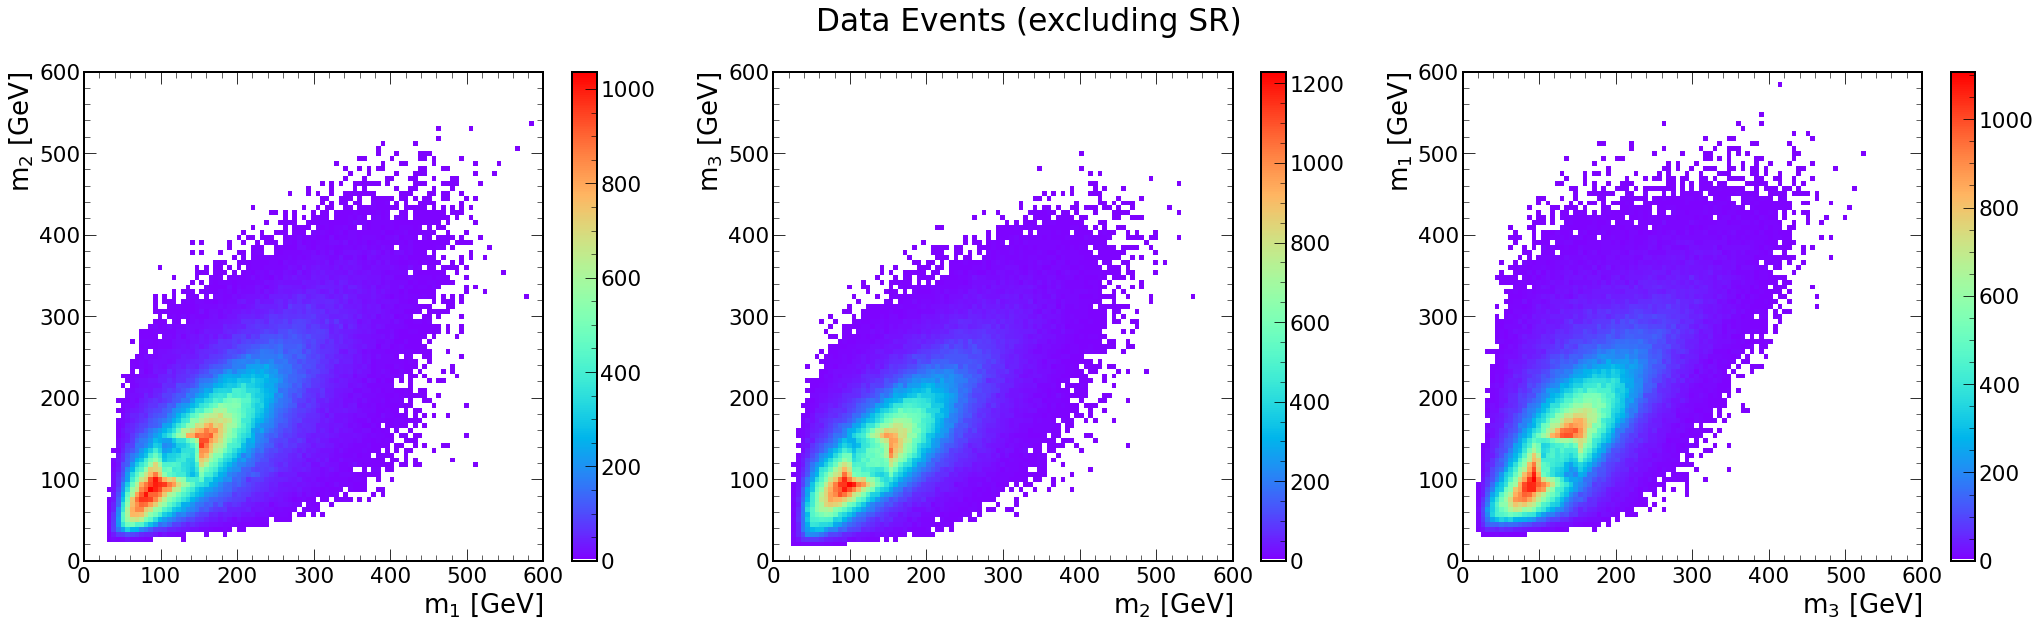

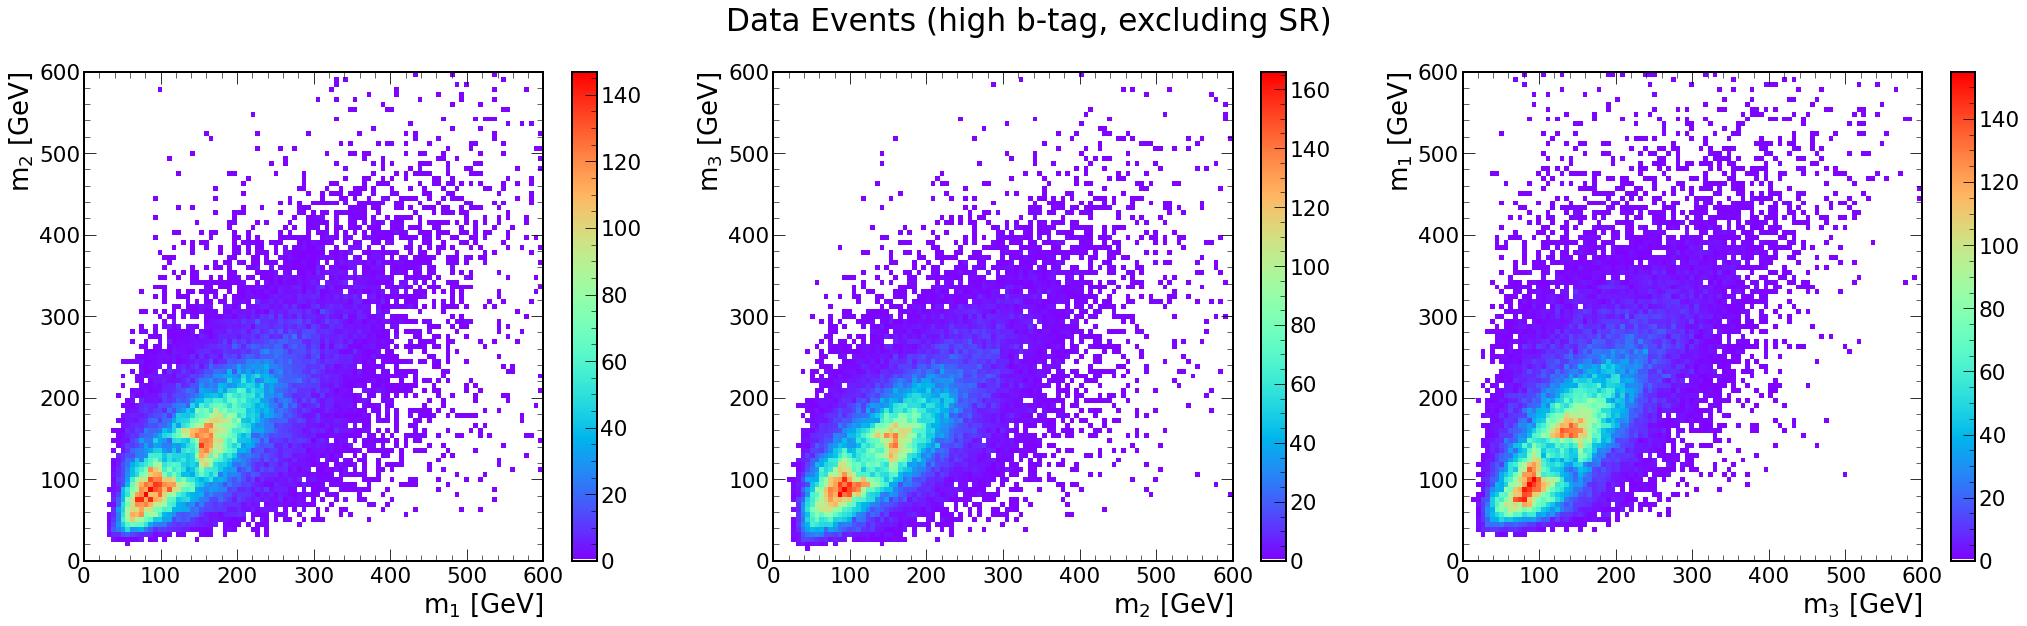

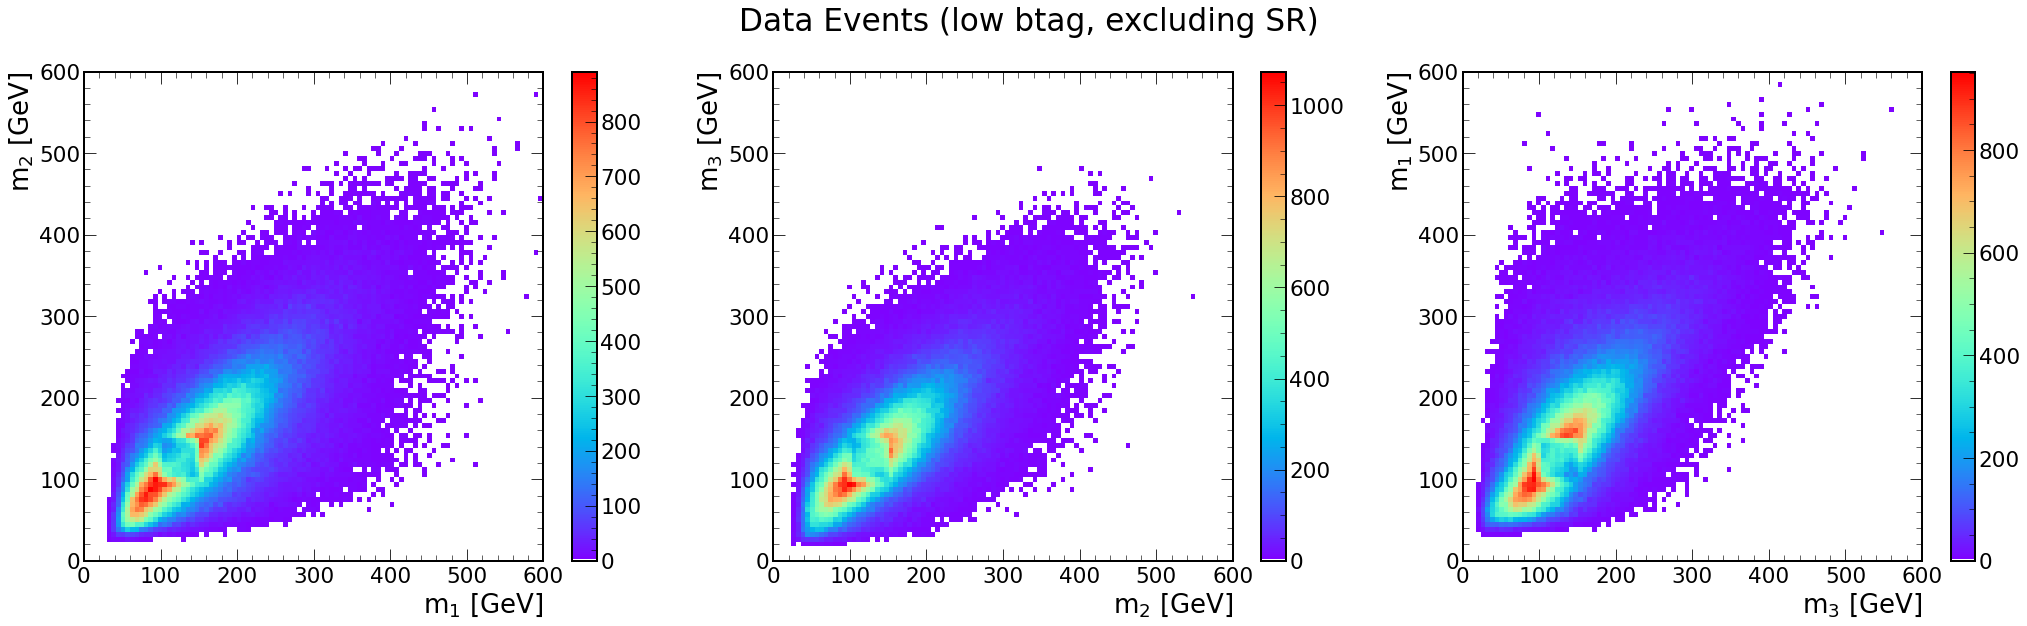

In [ ]:
# fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

# ax = axs[0]
# n,xe,ye,im = Hist2d(dat_m1, dat_sums, bins=(mHbins, score_bins), ax=ax)
# fig.colorbar(im, ax=ax)

# ax = axs[1]
# n,xe,ye,im = Hist2d(dat_m2, dat_sums, bins=(mHbins, score_bins), ax=ax)
# fig.colorbar(im, ax=ax)

# ax = axs[2]
# n,xe,ye,im = Hist2d(dat_m3, dat_sums, bins=(mHbins, score_bins), ax=ax)
# fig.colorbar(im, ax=ax)

# for i,ax in enumerate(axs.flatten()):
#     ax.set_ylabel('Average b-tag score')
#     ax.set_xlabel(f'$m_{i+1}$ [GeV]')
#     ax.plot([mHbins.min(), mHbins.max()],[0.66,0.66], color='k')
#     ax.plot([100,100],[score_bins.min(), score_bins.max()], color='k')
#     ax.plot([150,150],[score_bins.min(), score_bins.max()], color='k')
#     ax.plot([65,65],[score_bins.min(), score_bins.max()], color='k')
#     ax.plot([185,185],[score_bins.min(), score_bins.max()], color='k')

# fig.suptitle('Data Events (excluding SR)')

# fig.savefig('../plots/Data_SRexclusion_btag_v_mHreco.pdf', bbox_inches='tight')


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))
fig.suptitle('Data Events (excluding SR)')

ax = axs[0]
n,xe,ye,im = Hist2d(dat_m1, dat_m2, bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(dat_m2, dat_m3, bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(dat_m3, dat_m1, bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    # draw_circle = plt.Circle((125, 125), 25, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # draw_circle = plt.Circle((125, 125), 60, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # draw_circle = plt.Circle((185, 185), 25, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # draw_circle = plt.Circle((185, 185), 60, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # ax.set_ylabel('Average b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')
    if i ==2: i = -1
    ax.set_ylabel(f'$m_{i+2}$ [GeV]')
fig.savefig('../plots/Data_SRexclusion_mHreco.pdf', bbox_inches='tight')

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))
fig.suptitle('Data Events (high b-tag, excluding SR)')

ax = axs[0]
n,xe,ye,im = Hist2d(dat_m1[dat_hi], dat_m2[dat_hi], bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(dat_m2[dat_hi], dat_m3[dat_hi], bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(dat_m3[dat_hi], dat_m1[dat_hi], bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    # draw_circle = plt.Circle((125, 125), 25, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # draw_circle = plt.Circle((125, 125), 60, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # draw_circle = plt.Circle((185, 185), 25, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # draw_circle = plt.Circle((185, 185), 60, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # ax.set_ylabel('Average b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')
    if i ==2: i = -1
    ax.set_ylabel(f'$m_{i+2}$ [GeV]')

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))
fig.suptitle('Data Events (low btag, excluding SR)')

ax = axs[0]
n,xe,ye,im = Hist2d(dat_m1[dat_lo], dat_m2[dat_lo], bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(dat_m2[dat_lo], dat_m3[dat_lo], bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(dat_m3[dat_lo], dat_m1[dat_lo], bins=(mHbins, mHbins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    draw_circle = plt.Circle((125, 125), 25, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # draw_circle = plt.Circle((125, 125), 60, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # draw_circle = plt.Circle((185, 185), 25, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # draw_circle = plt.Circle((185, 185), 60, fill=False, color='k', linewidth=1.5)
    # ax.add_artist(draw_circle)
    # ax.set_ylabel('Average b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')
    if i ==2: i = -1
    ax.set_ylabel(f'$m_{i+2}$ [GeV]')

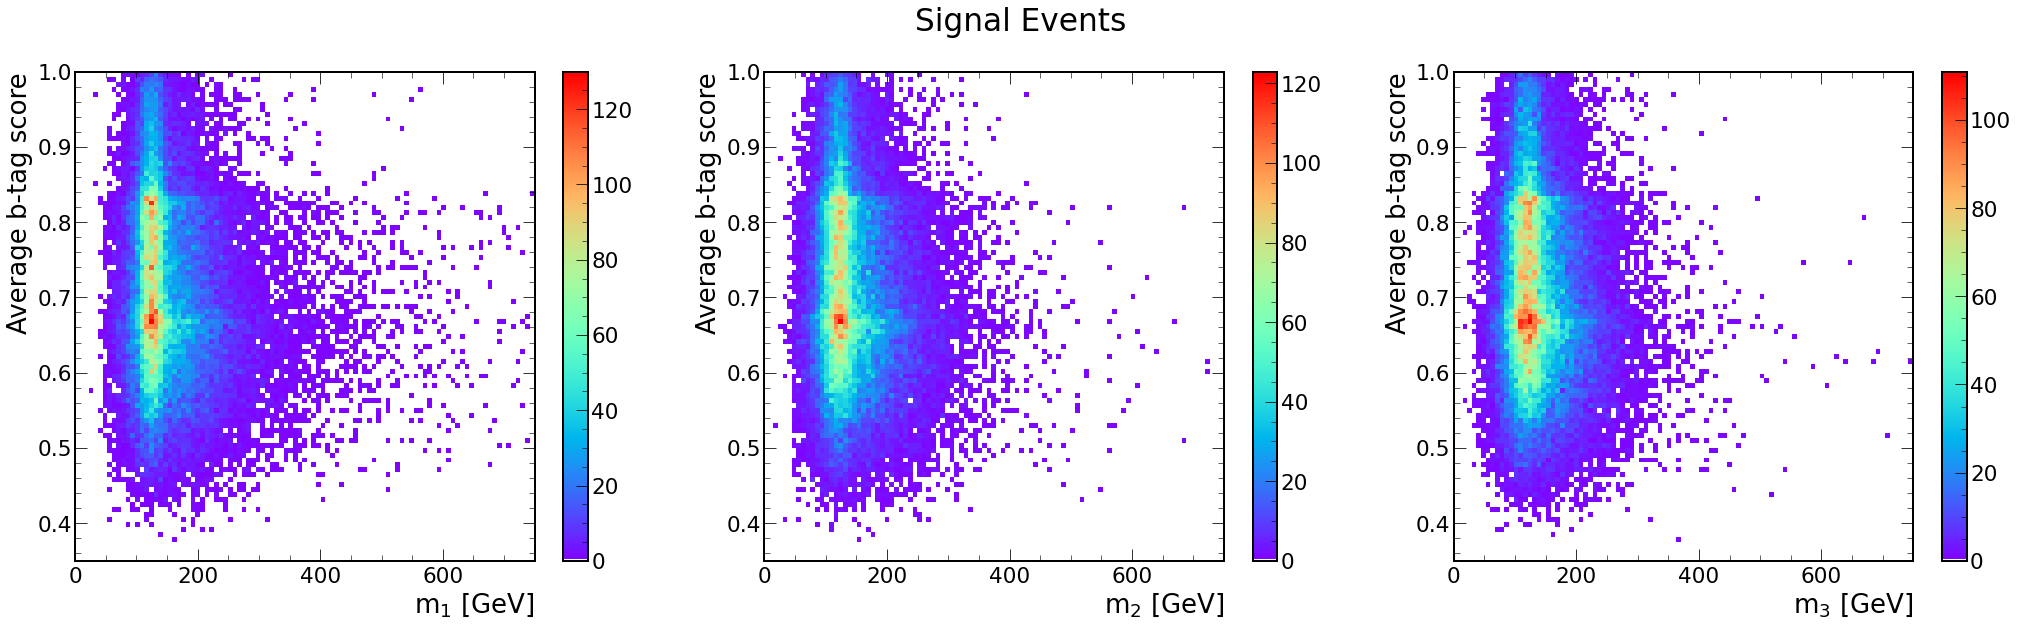

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

ax = axs[0]
n,xe,ye,im = Hist2d(sig_m1, sig_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(sig_m2, sig_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(sig_m3, sig_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    ax.set_ylabel('Average b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')

fig.suptitle('Signal Events')

fig.savefig('Signal_700_400_btag_v_mHreco.pdf', bbox_inches='tight')

In [ ]:
sig_4sums = ak.sum(sigTree.t6_jet_btag[:,:4], axis=1)/4
dat_4sums = ak.sum(datTree.t6_jet_btag[:,:4], axis=1)[~dat_SR]/4

Text(0.5, 0.98, 'Data Events (excluding SR)')

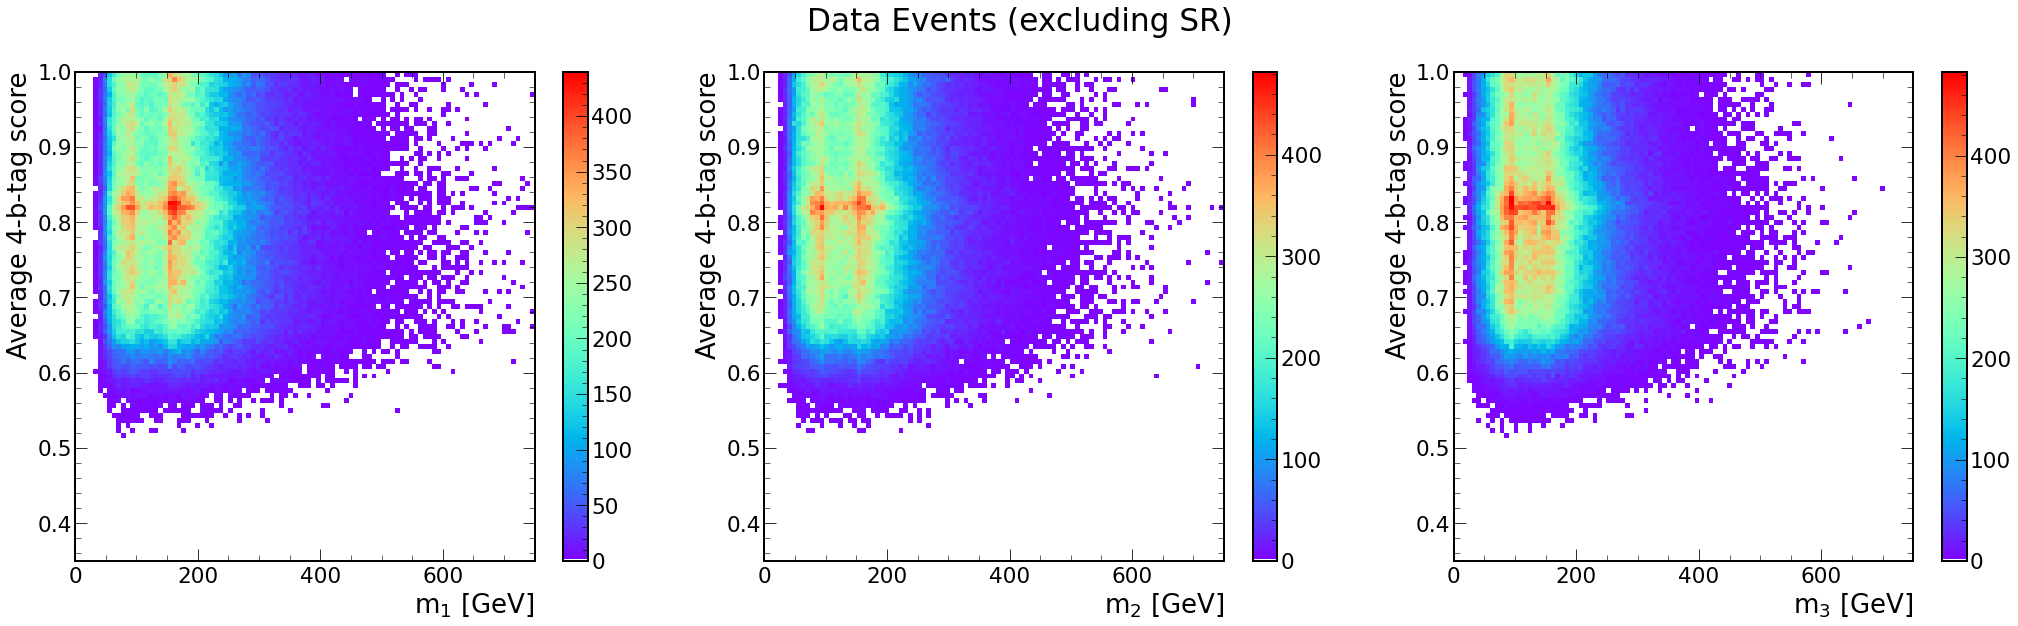

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

ax = axs[0]
n,xe,ye,im = Hist2d(dat_m1, dat_4sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(dat_m2, dat_4sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(dat_m3, dat_4sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    ax.set_ylabel('Average 4-b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')

fig.suptitle('Data Events (excluding SR)')